## Reading ICON Meteogram data directly using xarray

In [1]:
# For jupyterlab
%matplotlib inline

import numpy as np
import xarray as xr
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# for jupyter notebook
%matplotlib notebook

## What to do

The actual values are all given in "values". You have to address them with ds["values"] otherwise xarray thinks you want to use the values() method for the dataset.  

* First dimension of values: time  
* Second : level   
* Third : variable
* Fourth : station (here only 1 station)

In [2]:
year = "2020"
month = "09"
day = "01"

icon_path = "/data/inscape/icon/experiments/nyalesund/testbed/"+year+month+day+"_r600m_f2km/"

# Read in Meteogram
ds_icon = xr.open_dataset(icon_path+"METEOGRAM_patch001.nc")

In [3]:
# Selecting a variable (here pressure) 
pres = ds_icon["values"][:,:,0] # last one is the 

In [4]:
# Variables
ds_icon.var_name.values

array([b'P', b'T', b'PEXNER', b'RHO', b'THETAV', b'U', b'V', b'W', b'TKE',
       b'QV', b'QC', b'QI', b'QR', b'QS', b'REL_HUM', b'QG', b'QH',
       b'QNI', b'QNS', b'QNR', b'QNG', b'QNH', b'QNC', b'NIACT',
       b'QV_DIA', b'QC_DIA', b'QI_DIA', b'CLC', b'TKVM', b'TKVH',
       b'PHALF', b'T_SO', b'W_SO', b'W_SO_ICE'], dtype='|S128')

In [5]:
# All time steps for specific level
pres_sfc = pres[:,-2]
# All levels for specific time
pres_single_step = pres[0,:]

Text(0, 0.5, 'hPa')

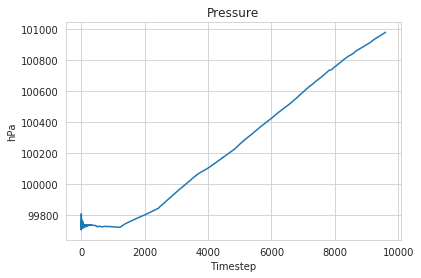

In [7]:
sns.set_style("whitegrid")

fig = plt.figure()
plt.plot(pres_sfc.values[:,0])
plt.title("Pressure")
plt.xlabel("Timestep")
plt.ylabel("hPa")